# Convolutional Neural Network (CNN)

## 1. Import required libraries 

In [1]:
import tensorflow as tf 

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## 2. Download and prepare the CIFAR10 dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images/255.0, test_images/255.0

# 3. Verify the Data 

To verify the dataset, lets plot the first 20 images from training dataset and display the class name below each image.

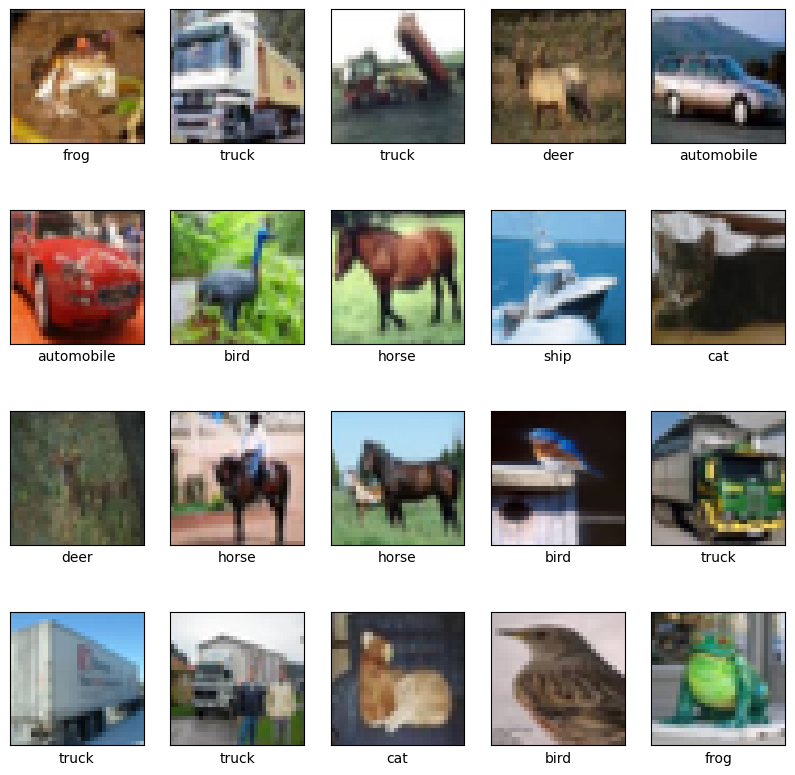

In [3]:
# Take the class names from 'https://www.cs.toronto.edu/~kriz/cifar.html'
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize = (10,10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# 4. Create a Convolutional Base 

A CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size.

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's see the architecture of the model 

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels)

# 5. Add Dense layers on top 

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

Let's see the complete structure of the model

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers. Now it is the time for compiling the model. 

## 6. Compile and train the model

In [8]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

trained_model = model.fit(train_images, train_labels, epochs = 10,
                   validation_data = (test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.5427 - accuracy: 0.4334 - val_loss: 1.2757 - val_accuracy: 0.5393
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1908 - accuracy: 0.5776 - val_loss: 1.1396 - val_accuracy: 0.6006
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0401 - accuracy: 0.6340 - val_loss: 1.0137 - val_accuracy: 0.6436
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9433 - accuracy: 0.6685 - val_loss: 0.9808 - val_accuracy: 0.6599
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8687 - accuracy: 0.6946 - val_loss: 0.9161 - val_accuracy: 0.6852
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8137 - accuracy: 0.7162 - val_loss: 0.9223 - val_accuracy: 0.6855
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7586 - accuracy: 0.7342 - val_loss: 0.8641 -

## 7. Evaluate the model 

313/313 - 1s - loss: 0.8774 - accuracy: 0.7110 - 1s/epoch - 4ms/step


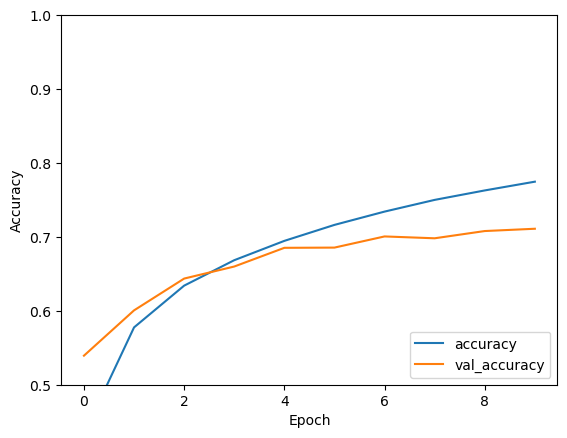

In [9]:
plt.plot(trained_model.history['accuracy'], label = 'accuracy')
plt.plot(trained_model.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

In [10]:
print(test_acc)

0.7110000252723694
